# Task: Visualize the data stored in different forms

In [2]:
import numpy as np
import pickle
import json
import h5py


import matplotlib.pyplot as plt
%matplotlib inline

## Task1: visualize the data stored in npy file
- create a heatmap for the data stored in lab3_data.npy using matplotlibs imshow function
    - Hint: use "plt.imshow(data, cmap='viridis', aspect='auto')"

In [3]:
# Create data.npy
data_npy = np.random.rand(10, 10)
np.save('lab3_data.npy', data_npy)

Text(0.5, 1.0, 'Heatmap of lab3_data.npy')

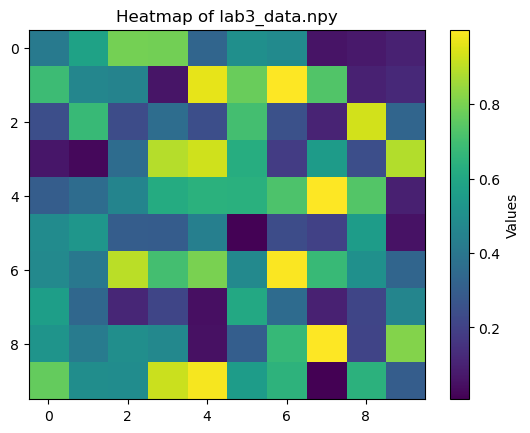

In [4]:
# Load the data from the npy file
data = np.load('lab3_data.npy')

# Plot the heatmap
plt.imshow(data, cmap='viridis', aspect='auto')
plt.colorbar(label='Values')
plt.title('Heatmap of lab3_data.npy')

## Task2: visualize the data stored in pkl file
- create a lineplot for the data stored in lab3_data.pkl using matplotlibs plot function
    - Hint: use "plt.plot(data['x'], data['y'], marker='o')"

In [5]:
# Create data.pkl
data_pkl = {'x': np.linspace(0, 10, 100), 'y': np.sin(np.linspace(0, 10, 100))}
with open('lab3_data.pkl', 'wb') as f:
    pickle.dump(data_pkl, f)

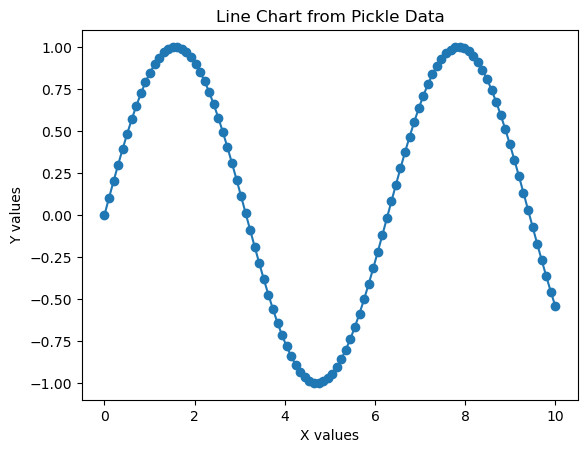

In [6]:
# Load the data from the pickle file
with open('lab3_data.pkl', 'rb') as f:
    data = pickle.load(f)

# Plot the line chart
plt.plot(data['x'], data['y'], marker='o')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Line Chart from Pickle Data')
plt.show()

## Task3: visualize the data stored in a json file
- create a scatter for the data stored in lab3_data.json using matplotlibs scatter function
    - Hint: use "plt.scatter(x, y)"

In [6]:
# Create data.json
data_json = [{'x': i, 'y': np.random.rand()} for i in range(100)]
with open('lab3_data.json', 'w') as f:
    json.dump(data_json, f)

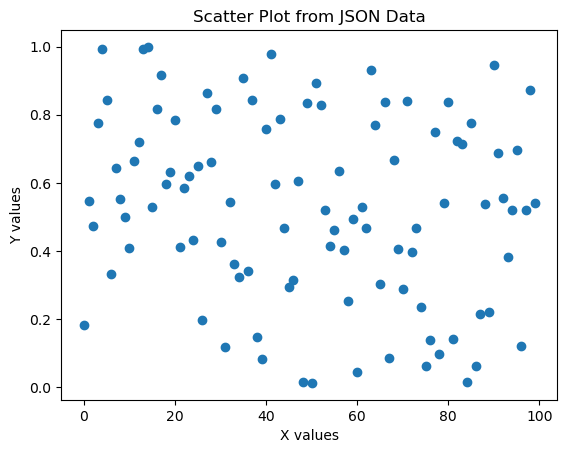

In [7]:
# Load the data from the JSON file
with open('lab3_data.json', 'r') as f:
    data = json.load(f)

# Extract x and y values
x = [point['x'] for point in data]
y = [point['y'] for point in data]

# Plot the scatter plot
plt.scatter(x, y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot from JSON Data')
plt.show()

## Task4: visualize the data stored in a h5py file
- create a histogram for the data stored in lab3_data.h5 using matplotlibs hist function
    - Hint: use "plt.hist(dataset, bins=30, edgecolor='black')"

In [8]:
with h5py.File('lab3_data.h5', 'w') as f:
    f.create_dataset('dataset1', data=np.random.randn(1000))

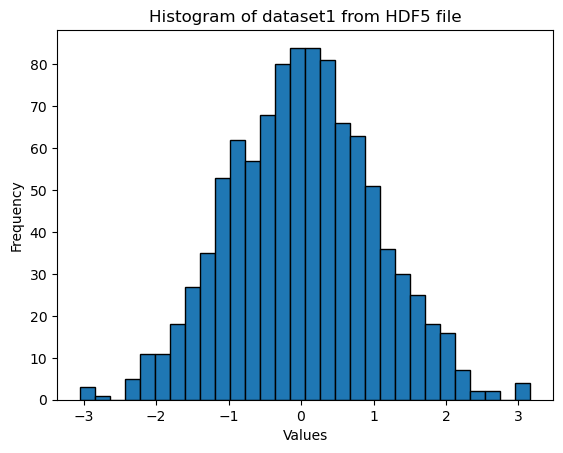

In [9]:
# Load the dataset from the HDF5 file
with h5py.File('lab3_data.h5', 'r') as f:
    dataset = f['dataset1'][:]

# Plot the histogram
plt.hist(dataset, bins=30, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of dataset1 from HDF5 file')
plt.show()

# Task 5: Visualization of data coming from multiple file types
- You are given three files:
    - data.npy contains an array of y values.
    - data.json contains a list of x values.
    - metadata.pkl contains a dictionary with labels for the plot.

- Your task is to:
    - Load the data from all three files.
    - Plot the x values (from JSON) against the y values (from .npy).
    - Use the title and axis labels from the Pickle file for the plot.

In [15]:
y_values = np.random.rand(100)
np.save('lab3_data_y.npy', y_values)

x_values = list(np.linspace(0, 10, 100))
with open('lab3_data_x.json', 'w') as f:
    json.dump(x_values, f)


metadata = {
    'xlabel': 'X Axis (Time)',
    'ylabel': 'Y Axis (Amplitude)',
    'title': 'X vs Y Plot from Multiple File Types'
}
with open('lab3_metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)

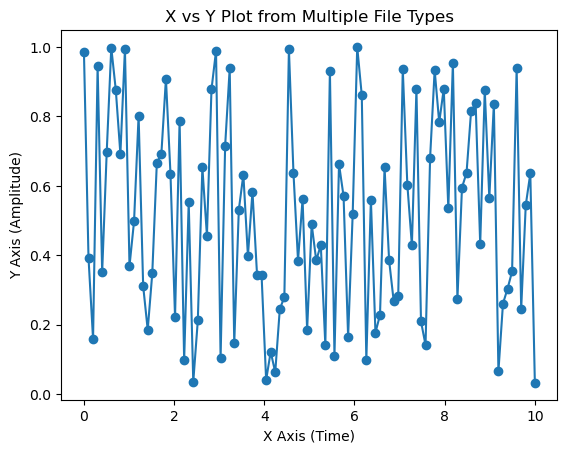

In [16]:
# Load the data from npy, json, and pickle files
y = np.load('lab3_data_y.npy')

with open('lab3_data_x.json', 'r') as f:
    x = json.load(f)

with open('lab3_metadata.pkl', 'rb') as f:
    metadata = pickle.load(f)

# Plot the data with the metadata information
plt.plot(x, y, marker='o')
plt.xlabel(metadata['xlabel'])
plt.ylabel(metadata['ylabel'])
plt.title(metadata['title'])
plt.show()